In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=(10,10)

In [3]:
data=pd.read_csv(r'C:\Users\risvarrt\Untitled Folder\healthcare-dataset-stroke-data.csv')

In [4]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Data Analysis

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
data['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.7    37
26.1    37
        ..
13.9     1
49.9     1
40.6     1
52.3     1
44.1     1
Name: bmi, Length: 418, dtype: int64

In [8]:
data['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [16]:
data['bmi'].fillna(data['bmi'].mean(),inplace=True)

In [17]:
data.isnull().sum()


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [18]:
data.drop('id',axis=1,inplace=True) 

In [19]:
data


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


 # Outlier Removal

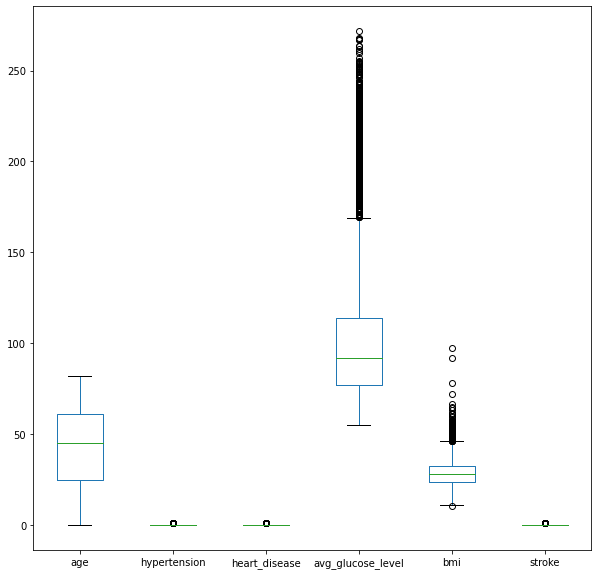

In [23]:
data.plot(kind='box')
plt.show()

In [24]:
data['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

# Label Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()

In [30]:
gender=en.fit_transform(data['gender'])
smoking_status=en.fit_transform(data['smoking_status'])
work_type=en.fit_transform(data['work_type'])
Residence_type=en.fit_transform(data['Residence_type'])
ever_married=en.fit_transform(data['ever_married'])

In [33]:
work_type

array([2, 3, 2, ..., 3, 2, 0])

In [37]:
data['work_type']=work_type
data['gender']=gender
data['smoking_status']=smoking_status
data['Residence_type']=Residence_type
data['ever_married']=ever_married

In [38]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


# Data Splitting

In [40]:
X=data.drop('stroke',axis=1)

In [41]:
Y=data['stroke']

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=220)

In [50]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4773,1,73.0,0,0,1,2,0,121.83,30.3,1
341,0,37.0,0,0,1,2,0,75.18,48.2,1
1050,1,61.0,0,0,1,2,1,99.16,26.6,3
1051,1,27.0,0,0,0,3,0,63.53,26.9,2
781,0,51.0,0,0,1,2,1,82.59,26.2,1
...,...,...,...,...,...,...,...,...,...,...
120,0,58.0,0,0,1,2,0,59.86,28.0,1
1204,0,33.0,0,0,0,2,1,121.19,22.1,2
15,0,50.0,1,0,1,3,0,167.41,30.9,2
2780,1,32.0,0,0,1,3,1,160.64,20.4,3


# Normalize

In [45]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [52]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [53]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [54]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4773,1,73.0,0,0,1,2,0,121.83,30.3,1
341,0,37.0,0,0,1,2,0,75.18,48.2,1
1050,1,61.0,0,0,1,2,1,99.16,26.6,3
1051,1,27.0,0,0,0,3,0,63.53,26.9,2
781,0,51.0,0,0,1,2,1,82.59,26.2,1
...,...,...,...,...,...,...,...,...,...,...
120,0,58.0,0,0,1,2,0,59.86,28.0,1
1204,0,33.0,0,0,0,2,1,121.19,22.1,2
15,0,50.0,1,0,1,3,0,167.41,30.9,2
2780,1,32.0,0,0,1,3,1,160.64,20.4,3


In [58]:
X_train_std

array([[ 1.19722   ,  1.30498445, -0.33115466, ...,  0.34103593,
         0.17790203, -0.35843587],
       [-0.83358306, -0.29405465, -0.33115466, ..., -0.6884354 ,
         2.50424164, -0.35843587],
       [ 1.19722   ,  0.77197142, -0.33115466, ..., -0.15924521,
        -0.30296147,  1.51653001],
       ...,
       [-0.83358306,  0.28337614,  3.01973705, ...,  1.34689452,
         0.25587989,  0.57904707],
       [ 1.19722   , -0.51614341, -0.33115466, ...,  1.19749428,
        -1.10873273,  1.51653001],
       [-0.83358306, -1.22682746, -0.33115466, ..., -0.43796381,
         1.724463  ,  0.57904707]])

# Training

# Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [61]:
dtc.fit(X_train_std,Y_train)

DecisionTreeClassifier()

In [63]:
dtc.feature_importances_

array([0.02373962, 0.22119939, 0.02467058, 0.02917492, 0.00378523,
       0.04326707, 0.02092253, 0.29737496, 0.27693093, 0.05893478])

In [70]:
Y_pred=dtc.predict(X_test_std)

In [65]:
Y_test

5024    0
4609    0
54      1
4801    0
86      1
       ..
194     1
2077    0
168     1
4283    0
2595    0
Name: stroke, Length: 1022, dtype: int64

In [67]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
5024,1,33.0,0,0,1,2,0,153.34,31.500000,2
4609,0,40.0,0,0,1,2,1,58.64,33.000000,2
54,0,63.0,0,0,1,0,1,197.54,28.893237,2
4801,1,62.0,0,0,1,2,1,81.64,38.200000,2
86,1,61.0,0,1,1,2,0,111.81,27.300000,3
...,...,...,...,...,...,...,...,...,...,...
194,0,72.0,0,0,1,2,0,97.92,26.900000,3
2077,1,74.0,0,0,1,2,0,65.28,28.200000,2
168,0,79.0,1,0,0,0,1,98.02,22.300000,1
4283,1,59.0,1,0,1,0,0,253.93,28.893237,1


In [72]:
from sklearn.metrics import accuracy_score

In [74]:
ac_dt=accuracy_score(Y_test,Y_pred)

In [75]:
ac_dt

0.9050880626223092

# Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [78]:
lr.fit(X_train_std,Y_train)

LogisticRegression()

In [79]:
Y_pred=lr.predict(X_test_std)

In [80]:
ac_lr=accuracy_score(Y_test,Y_pred)

In [81]:
ac_lr

0.9549902152641878

# KNN

In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [86]:
knn.fit(X_train_std,Y_train)

KNeighborsClassifier()

In [87]:
Y_pred=knn.predict(X_test_std)

In [88]:
ac_knn=accuracy_score(Y_test,Y_pred)

In [89]:
ac_knn

0.952054794520548

# Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [92]:
rf.fit(X_train_std,Y_train)

RandomForestClassifier()

In [93]:
Y_pred_res=rf.predict(X_test_std)

In [94]:
ac_rf=accuracy_score(Y_test,Y_pred)

In [95]:
ac_rf

0.9549902152641878

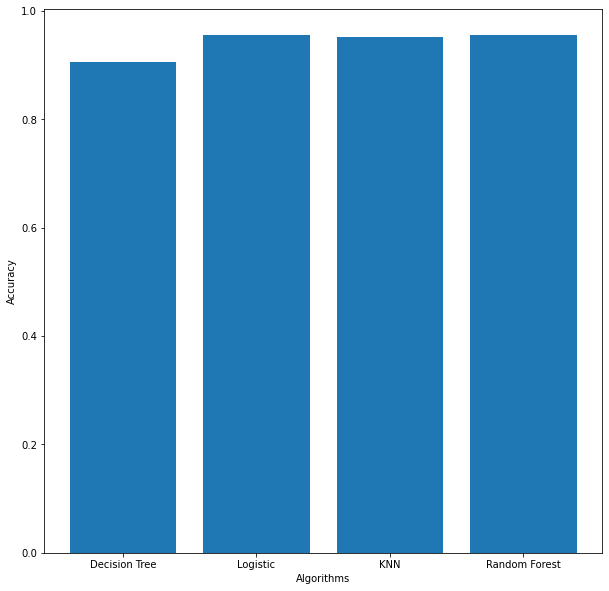

In [98]:
plt.bar(['Decision Tree','Logistic','KNN','Random Forest'],[ac_dt,ac_lr,ac_knn,ac_rf])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

In [102]:
import pickle
filename= r"C:\Users\risvarrt\Untitled Folder\final_model.sav"
pickle.dump(rf,open(filename,'wb'))